# Notebook : Limpieza de DataSets

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Iris Sucio

## AdultCense

Es un dataset que contiene información de personas del censo de EE. UU. con 14 columnas.

### Problema

valores desconocidos marcados como "?" en columnas como "workclass", "occupation" y "native-country", ademas que todas las columnas se leen como texto.

### Explorando el Dataset

primero lo que haremos es cargar el dataset y mirar sus primeras filas

In [39]:
adult_csv = pd.read_csv("data/adult.data.csv")

adult_csv.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


notamos que este datasaet no posee una fila para el nombre de las columnas

In [8]:
pd.DataFrame({
    "Filas": [adult_csv.shape[0]],
    "Columnas": [adult_csv.shape[1]]
})

,Filas,Columnas
0,32561,15


revisamos los datos por columna

In [9]:
adult_csv.dtypes.to_frame("Tipo de dato")

,Tipo de dato
0,int64
1,object
2,int64
3,object
4,int64
5,object
6,object
7,object
8,object
9,object


y ahora imprimimos valores de muestra

In [13]:
sample_values = {}
for col in adult_csv.columns:
    sample_values[col] = adult_csv[col].unique()[:2]

# Convertir en tabla: columna → valor1, valor2
sample_df = pd.DataFrame(sample_values).T
sample_df.columns = ["Ejemplo 1", "Ejemplo 2"]

sample_df

,Ejemplo 1,Ejemplo 2
0,39,50
1,State-gov,Self-emp-not-inc
2,77516,83311
3,Bachelors,HS-grad
4,13,9
5,Never-married,Married-civ-spouse
6,Adm-clerical,Exec-managerial
7,Not-in-family,Husband
8,White,Black
9,Male,Female


agregamos nombres a las columnas y agregamos los valores desconocidos por algo que pandas pueda identificar

In [25]:
column_names = [
    "age", "workclass", "none_1", "education", "none_2",
    "marital_status", "occupation", "relationship", "race", "sex",
    "none_3", "none_4", "none_5", "native_country", "annual_income"
]

df = pd.read_csv(
    "data/adult.data.csv",
    header=None,
    names=column_names,
    na_values="?",
    skipinitialspace=True
)

df.head()

,age,workclass,none_1,education,none_2,marital_status,occupation,relationship,race,sex,none_3,none_4,none_5,native_country,annual_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


hacemos un analisis de las columnas que no se pudieron identificar a simple vista

In [26]:
none_cols = [col for col in df.columns if col.startswith("none")]

for col in none_cols:
    print(f"\n===== Análisis de columna: {col} =====")
    print("Primeros valores:")
    print(df[col].head(10).to_list())
    print("\nValores únicos (muestra hasta 10):")
    print(df[col].unique()[:10])
    print("\nConteo de tipos de dato:")
    print(df[col].apply(type).value_counts())
    print("\nDescripción estadística:")
    print(df[col].describe(include='all'))
    print("="*50)


===== Análisis de columna: none_1 =====
Primeros valores:
[77516, 83311, 215646, 234721, 338409, 284582, 160187, 209642, 45781, 159449]

Valores únicos (muestra hasta 10):
[ 77516  83311 215646 234721 338409 284582 160187 209642  45781 159449]

Conteo de tipos de dato:
none_1
<class 'int'>    32561
Name: count, dtype: int64

Descripción estadística:
count    3.256100e+04
mean     1.897784e+05
std      1.055500e+05
min      1.228500e+04
25%      1.178270e+05
50%      1.783560e+05
75%      2.370510e+05
max      1.484705e+06
Name: none_1, dtype: float64

===== Análisis de columna: none_2 =====
Primeros valores:
[13, 13, 9, 7, 13, 14, 5, 9, 14, 13]

Valores únicos (muestra hasta 10):
[13  9  7 14  5 10 12 11  4 16]

Conteo de tipos de dato:
none_2
<class 'int'>    32561
Name: count, dtype: int64

Descripción estadística:
count    32561.000000
mean        10.080679
std          2.572720
min          1.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         16.0

podemos sacar la columna "none_5" como las horas trabajadas por semana gracias a su promedio

In [27]:
column_names = [
    "age", "workclass", "none_1", "education", "none_2",
    "marital_status", "occupation", "relationship", "race", "sex",
    "none_3", "none_4", "hours_per_week", "native_country", "annual_income"
]

df = pd.read_csv(
    "data/adult.data.csv",
    header=None,
    names=column_names,
    na_values="?",
    skipinitialspace=True
)

df.head()

,age,workclass,none_1,education,none_2,marital_status,occupation,relationship,race,sex,none_3,none_4,hours_per_week,native_country,annual_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


ahora verificamos si todas las columnas que manejan numeros efectivamente se leen como numeros

In [28]:
numeric_cols = ["age", "none_1", "none_2", "none_3", "none_4", "hours_per_week"]

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

df[numeric_cols].dtypes


age               int64
none_1            int64
none_2            int64
none_3            int64
none_4            int64
hours_per_week    int64
dtype: object

revisamos los datos nulos

In [29]:
df.isnull().sum()

age                  0
workclass         1836
none_1               0
education            0
none_2               0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
none_3               0
none_4               0
hours_per_week       0
native_country     583
annual_income        0
dtype: int64

imputamos los datos nulos con la moda

In [31]:
for col in ["workclass", "occupation", "native_country"]:
    df[col] = df[col].fillna(df[col].mode()[0])

df.isnull().sum()

age               0
workclass         0
none_1            0
education         0
none_2            0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
none_3            0
none_4            0
hours_per_week    0
native_country    0
annual_income     0
dtype: int64

hacemos limpieza al normalizar las categorias

In [38]:
for col in df.select_dtypes(include="object").columns:
    df[col] = df[col].str.strip()

for col in df.select_dtypes(include="object").columns:
    df[col] = df[col].str.lower()

print("workcalss",df["workclass"].unique())
print("\n")
print("marital_status",(df["marital_status"].unique()))

workcalss ['state-gov' 'self-emp-not-inc' 'private' 'federal-gov' 'local-gov'
 'self-emp-inc' 'without-pay' 'never-worked']


marital_status ['never-married' 'married-civ-spouse' 'divorced' 'married-spouse-absent'
 'separated' 'married-af-spouse' 'widowed']


quedaria como resultado el dataset limpio

In [40]:
df.head(10)

,age,workclass,none_1,education,none_2,marital_status,occupation,relationship,race,sex,none_3,none_4,hours_per_week,native_country,annual_income
0,39,state-gov,77516,bachelors,13,never-married,adm-clerical,not-in-family,white,male,2174,0,40,united-states,<=50k
1,50,self-emp-not-inc,83311,bachelors,13,married-civ-spouse,exec-managerial,husband,white,male,0,0,13,united-states,<=50k
2,38,private,215646,hs-grad,9,divorced,handlers-cleaners,not-in-family,white,male,0,0,40,united-states,<=50k
3,53,private,234721,11th,7,married-civ-spouse,handlers-cleaners,husband,black,male,0,0,40,united-states,<=50k
4,28,private,338409,bachelors,13,married-civ-spouse,prof-specialty,wife,black,female,0,0,40,cuba,<=50k
5,37,private,284582,masters,14,married-civ-spouse,exec-managerial,wife,white,female,0,0,40,united-states,<=50k
6,49,private,160187,9th,5,married-spouse-absent,other-service,not-in-family,black,female,0,0,16,jamaica,<=50k
7,52,self-emp-not-inc,209642,hs-grad,9,married-civ-spouse,exec-managerial,husband,white,male,0,0,45,united-states,>50k
8,31,private,45781,masters,14,never-married,prof-specialty,not-in-family,white,female,14084,0,50,united-states,>50k
9,42,private,159449,bachelors,13,married-civ-spouse,exec-managerial,husband,white,male,5178,0,40,united-states,>50k


## London Air Quality

Datos de contaminación del aire en Londres.

### problemas

los problemas de este dataset son:
- Gaps y valores nulos.
- Valores extremos (outliers).
- Fechas sin formato adecuado.

### Dataset

comenzaremos explorando el dataset y mirando sus primeras filas

In [122]:
air_quality = pd.read_csv("data/air-quality-london-monthly-averages.csv")

air_quality.head()
air_quality.info()
air_quality.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 15 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Month                                              139 non-null    object 
 1   London Mean Roadside:Nitric Oxide (ug/m3)          115 non-null    float64
 2   London Mean Roadside:Nitrogen Dioxide (ug/m3)      139 non-null    float64
 3   London Mean Roadside:Oxides of Nitrogen (ug/m3)    115 non-null    float64
 4   London Mean Roadside:Ozone (ug/m3)                 139 non-null    float64
 5   London Mean Roadside:PM10 Particulate (ug/m3)      139 non-null    float64
 6   London Mean Roadside:PM2.5 Particulate (ug/m3)     139 non-null    float64
 7   London Mean Roadside:Sulphur Dioxide (ug/m3)       139 non-null    float64
 8   London Mean Background:Nitric Oxide (ug/m3)        115 non-null    float64
 9   London Mea

,Month,London Mean Roadside:Nitric Oxide (ug/m3),London Mean Roadside:Nitrogen Dioxide (ug/m3),London Mean Roadside:Oxides of Nitrogen (ug/m3),London Mean Roadside:Ozone (ug/m3),London Mean Roadside:PM10 Particulate (ug/m3),London Mean Roadside:PM2.5 Particulate (ug/m3),London Mean Roadside:Sulphur Dioxide (ug/m3),London Mean Background:Nitric Oxide (ug/m3),London Mean Background:Nitrogen Dioxide (ug/m3),London Mean Background:Oxides of Nitrogen (ug/m3),London Mean Background:Ozone (ug/m3),London Mean Background:PM10 Particulate (ug/m3),London Mean Background:PM2.5 Particulate (ug/m3),London Mean Background:Sulphur Dioxide (ug/m3)
count,139,115.000000,139.000000,115.000000,139.000000,139.000000,139.000000,139.000000,115.000000,139.000000,115.000000,139.000000,139.000000,139,139.000000
unique,138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86,NaN
top,Dec-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.4,NaN
freq,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN
mean,NaN,75.619130,55.210072,136.865217,27.314388,25.011511,15.603597,3.410072,21.397391,34.534532,55.563478,37.379137,19.241007,NaN,3.300000
std,NaN,29.784035,8.264656,33.090965,8.333237,5.210289,4.910583,1.819870,14.258906,8.611677,22.039073,11.514537,4.705236,NaN,1.005852
min,NaN,22.000000,34.900000,68.600000,10.700000,16.300000,7.900000,-1.700000,4.200000,18.400000,24.400000,13.900000,11.900000,NaN,1.100000
25%,NaN,56.150000,48.700000,114.500000,21.150000,21.450000,12.350000,2.400000,11.700000,27.800000,38.200000,29.100000,16.100000,NaN,2.650000
50%,NaN,70.600000,55.500000,129.300000,26.400000,23.800000,14.200000,3.300000,17.200000,33.700000,51.400000,36.600000,18.100000,NaN,3.200000
75%,NaN,98.800000,60.300000,159.850000,34.150000,27.900000,18.150000,4.100000,29.400000,40.850000,69.000000,46.550000,21.500000,NaN,4.000000


In [123]:
print(air_quality.dtypes)

Month                                                 object
London Mean Roadside:Nitric Oxide (ug/m3)            float64
London Mean Roadside:Nitrogen Dioxide (ug/m3)        float64
London Mean Roadside:Oxides of Nitrogen (ug/m3)      float64
London Mean Roadside:Ozone (ug/m3)                   float64
London Mean Roadside:PM10 Particulate (ug/m3)        float64
London Mean Roadside:PM2.5 Particulate (ug/m3)       float64
London Mean Roadside:Sulphur Dioxide (ug/m3)         float64
London Mean Background:Nitric Oxide (ug/m3)          float64
London Mean Background:Nitrogen Dioxide (ug/m3)      float64
London Mean Background:Oxides of Nitrogen (ug/m3)    float64
London Mean Background:Ozone (ug/m3)                 float64
London Mean Background:PM10 Particulate (ug/m3)      float64
London Mean Background:PM2.5 Particulate (ug/m3)      object
London Mean Background:Sulphur Dioxide (ug/m3)       float64
dtype: object


revisaremos si existen valores nulos

In [124]:
air_quality.isna().sum()

Month                                                 0
London Mean Roadside:Nitric Oxide (ug/m3)            24
London Mean Roadside:Nitrogen Dioxide (ug/m3)         0
London Mean Roadside:Oxides of Nitrogen (ug/m3)      24
London Mean Roadside:Ozone (ug/m3)                    0
London Mean Roadside:PM10 Particulate (ug/m3)         0
London Mean Roadside:PM2.5 Particulate (ug/m3)        0
London Mean Roadside:Sulphur Dioxide (ug/m3)          0
London Mean Background:Nitric Oxide (ug/m3)          24
London Mean Background:Nitrogen Dioxide (ug/m3)       0
London Mean Background:Oxides of Nitrogen (ug/m3)    24
London Mean Background:Ozone (ug/m3)                  0
London Mean Background:PM10 Particulate (ug/m3)       0
London Mean Background:PM2.5 Particulate (ug/m3)      0
London Mean Background:Sulphur Dioxide (ug/m3)        0
dtype: int64

convertimos a un formato apropiado la fecha y cambiamos la penultima comlumna para que sea numerica

In [125]:
air_quality["Month"] = pd.to_datetime(
    air_quality["Month"], 
    format="%b-%y", 
    errors="coerce"
)

# Forzar la columna PM2.5 a numérica (los no convertibles serán NaN)
air_quality["London Mean Background:PM2.5 Particulate (ug/m3)"] = pd.to_numeric(
    air_quality["London Mean Background:PM2.5 Particulate (ug/m3)"],
    errors="coerce"
)

revisamos

In [126]:
print(air_quality.dtypes)

Month                                                datetime64[ns]
London Mean Roadside:Nitric Oxide (ug/m3)                   float64
London Mean Roadside:Nitrogen Dioxide (ug/m3)               float64
London Mean Roadside:Oxides of Nitrogen (ug/m3)             float64
London Mean Roadside:Ozone (ug/m3)                          float64
London Mean Roadside:PM10 Particulate (ug/m3)               float64
London Mean Roadside:PM2.5 Particulate (ug/m3)              float64
London Mean Roadside:Sulphur Dioxide (ug/m3)                float64
London Mean Background:Nitric Oxide (ug/m3)                 float64
London Mean Background:Nitrogen Dioxide (ug/m3)             float64
London Mean Background:Oxides of Nitrogen (ug/m3)           float64
London Mean Background:Ozone (ug/m3)                        float64
London Mean Background:PM10 Particulate (ug/m3)             float64
London Mean Background:PM2.5 Particulate (ug/m3)            float64
London Mean Background:Sulphur Dioxide (ug/m3)  

miramos si hay datos repetidos

In [128]:
# Ver duplicados en la columna Month
duplicates = air_quality[air_quality["Month"].duplicated(keep=False)]
print(duplicates)

        Month  London Mean Roadside:Nitric Oxide (ug/m3)  \
71 2012-12-01                                      113.1   
59 2012-12-01                                      112.5   

    London Mean Roadside:Nitrogen Dioxide (ug/m3)  \
71                                           57.9   
59                                           63.9   

    London Mean Roadside:Oxides of Nitrogen (ug/m3)  \
71                                            171.3   
59                                            176.5   

    London Mean Roadside:Ozone (ug/m3)  \
71                                25.2   
59                                24.2   

    London Mean Roadside:PM10 Particulate (ug/m3)  \
71                                           26.2   
59                                           23.1   

    London Mean Roadside:PM2.5 Particulate (ug/m3)  \
71                                            14.5   
59                                            13.9   

    London Mean Roadside:Sulphur Dioxide (u

resolvemos los datos repetidos con la media

In [129]:
air_quality = air_quality.groupby("Month").mean(numeric_only=True).reset_index()

interpolamos

In [130]:
air_quality = air_quality.dropna(subset=["Month"])

# 3. Ordenar por fecha
air_quality = air_quality.sort_values("Month")

# 4. Crear rango completo de meses
full_range = pd.date_range(
    start=air_quality["Month"].min(),
    end=air_quality["Month"].max(),
    freq="MS"
)

# 5. Reindexar
air_quality = air_quality.set_index("Month").reindex(full_range)
air_quality.index.name = "Month"

# 6. Interpolar valores numéricos
air_quality = air_quality.interpolate(method="linear")

detectamos outliers con gráficos de caja

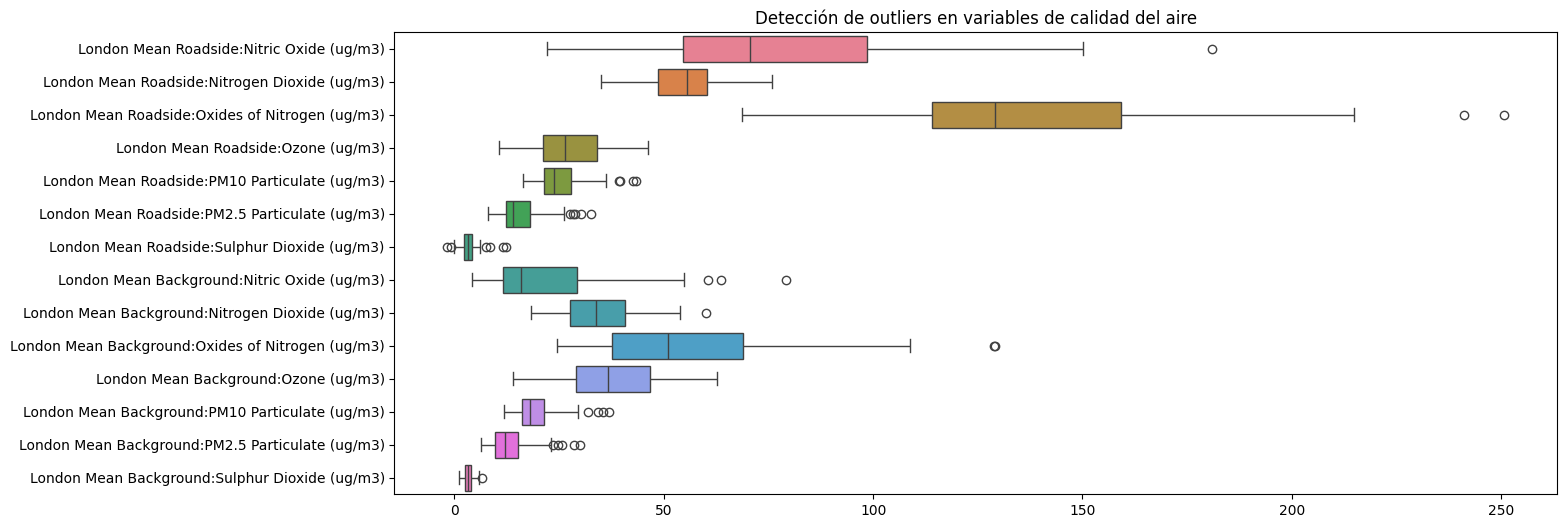

In [133]:
# Configuración estética
plt.figure(figsize=(15, 6))

# Dibujar boxplots para todas las columnas numéricas
sns.boxplot(data=air_quality, orient="h")

plt.title("Detección de outliers en variables de calidad del aire")
plt.show()

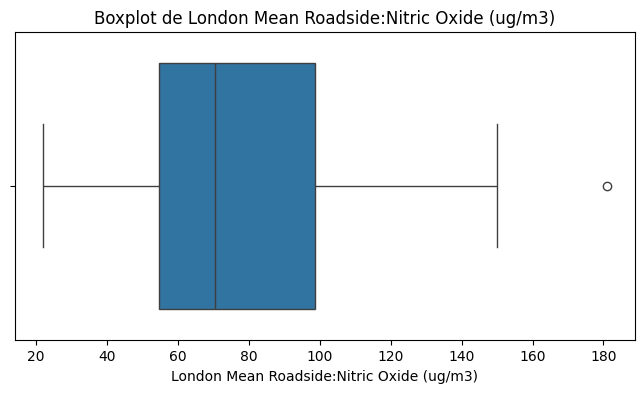

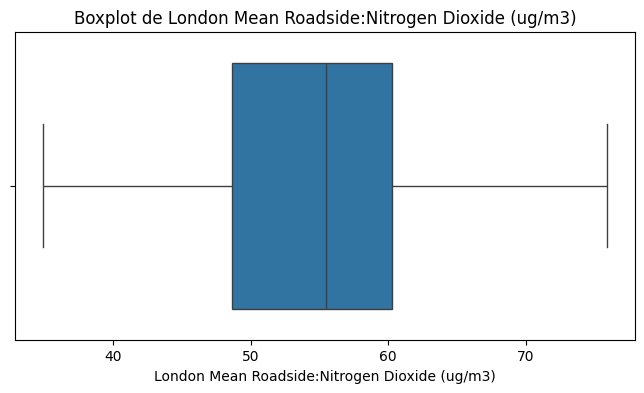

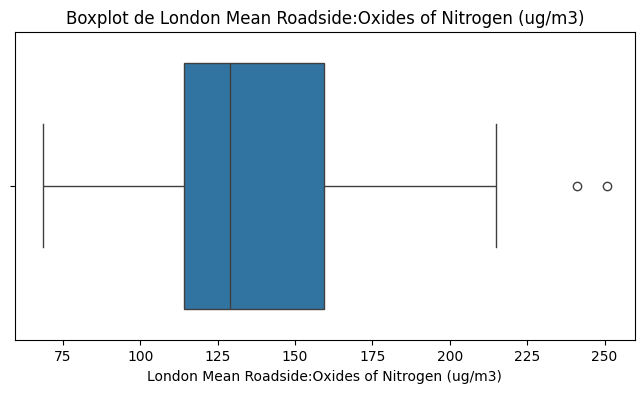

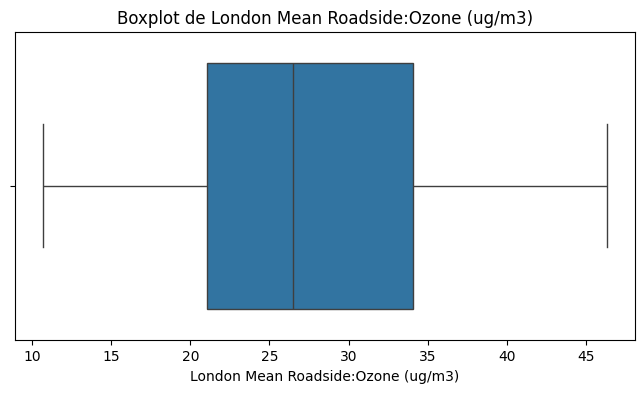

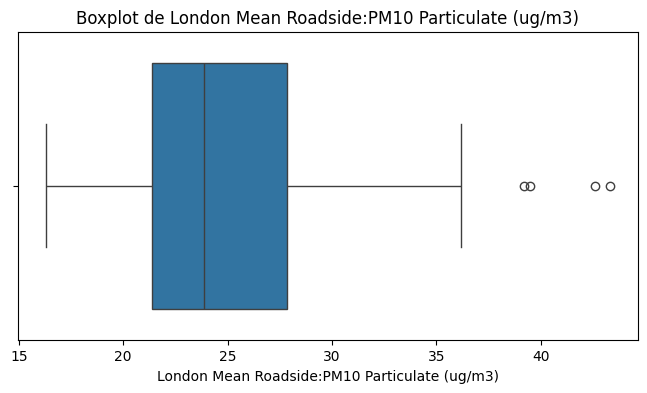

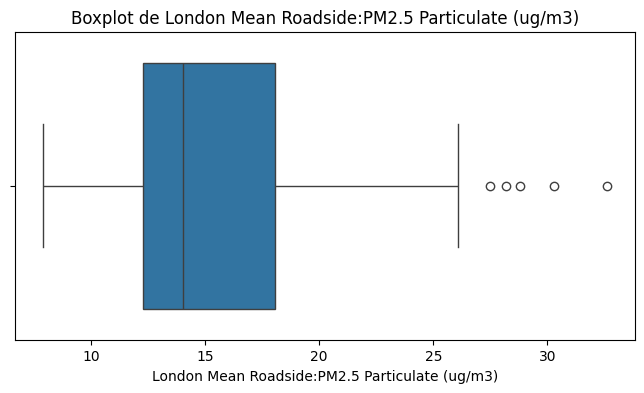

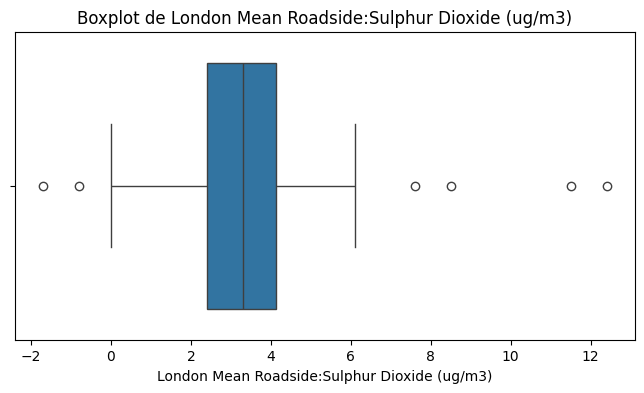

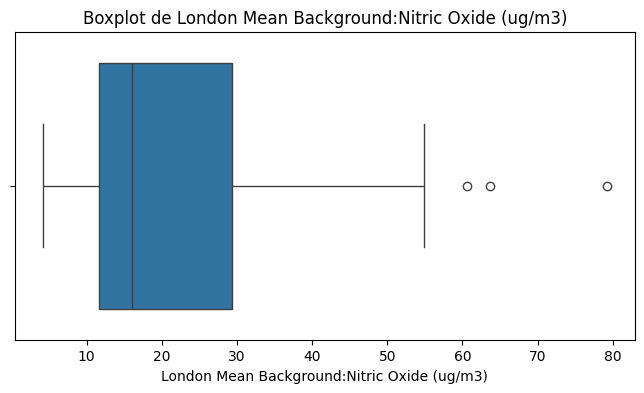

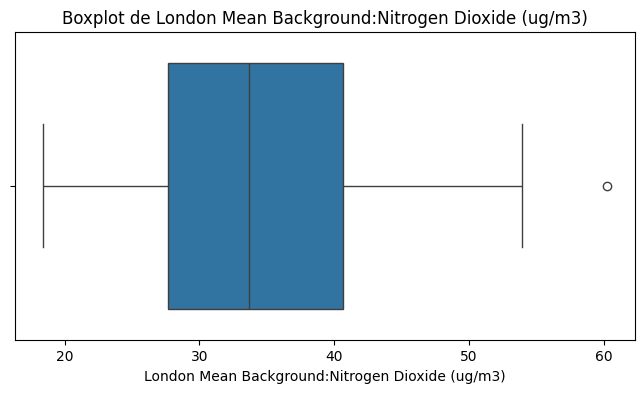

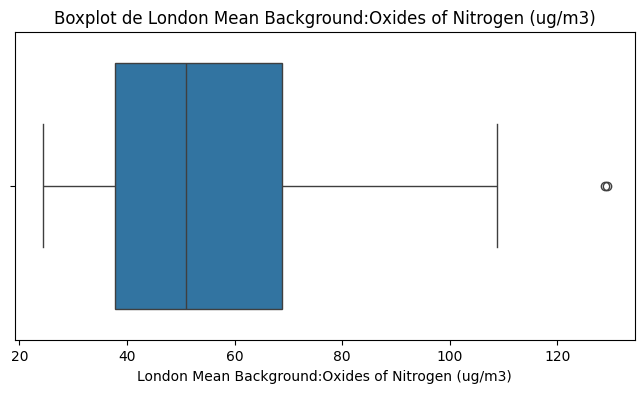

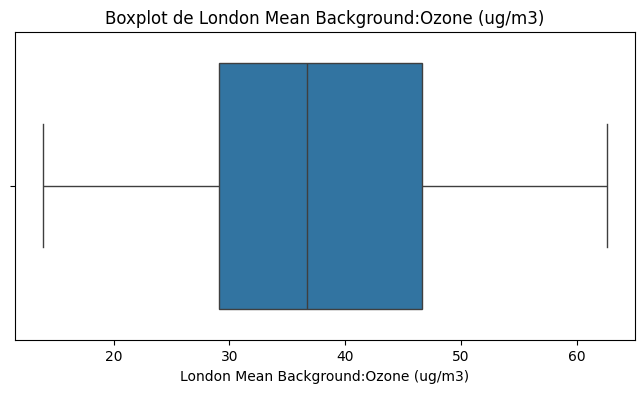

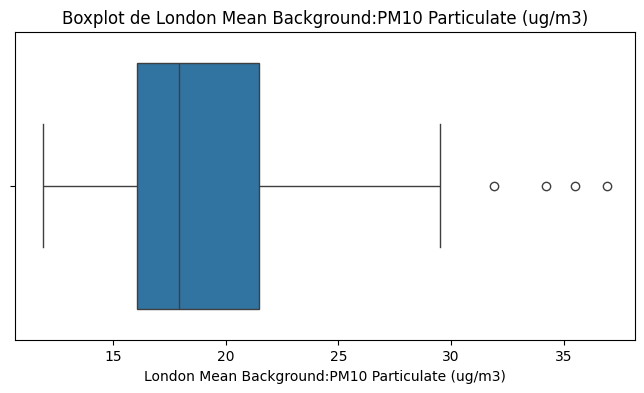

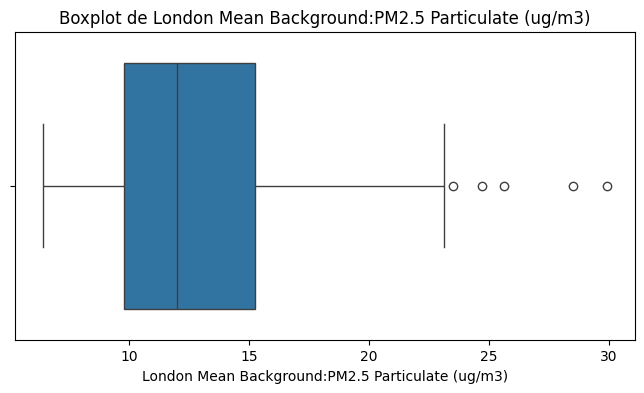

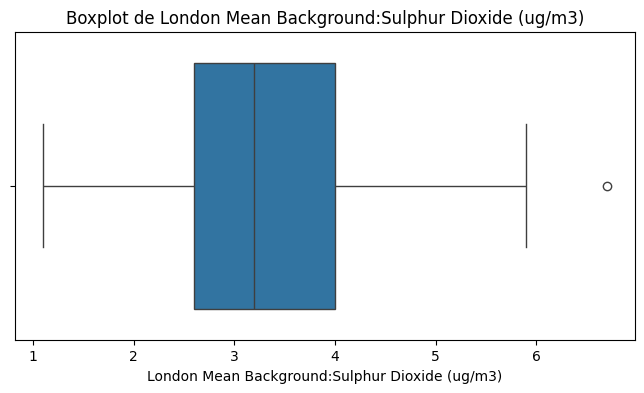

In [134]:
for col in air_quality.select_dtypes(include="number").columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=air_quality[col])
    plt.title(f"Boxplot de {col}")
    plt.show()

Agrupamos por mes y calculamos el promedio de todas las columnas numéricas

In [135]:
monthly_avg = air_quality.groupby("Month").mean(numeric_only=True)

monthly_avg.head()

,London Mean Roadside:Nitric Oxide (ug/m3),London Mean Roadside:Nitrogen Dioxide (ug/m3),London Mean Roadside:Oxides of Nitrogen (ug/m3),London Mean Roadside:Ozone (ug/m3),London Mean Roadside:PM10 Particulate (ug/m3),London Mean Roadside:PM2.5 Particulate (ug/m3),London Mean Roadside:Sulphur Dioxide (ug/m3),London Mean Background:Nitric Oxide (ug/m3),London Mean Background:Nitrogen Dioxide (ug/m3),London Mean Background:Oxides of Nitrogen (ug/m3),London Mean Background:Ozone (ug/m3),London Mean Background:PM10 Particulate (ug/m3),London Mean Background:PM2.5 Particulate (ug/m3),London Mean Background:Sulphur Dioxide (ug/m3)
Month,,,,,,,,,,,,,,
2008-01-01,NaN,55.5,NaN,29.5,25.0,14.7,4.2,NaN,42.3,NaN,36.9,18.8,NaN,3.6
2008-02-01,NaN,75.9,NaN,20.3,39.5,28.8,7.6,NaN,60.2,NaN,26.4,31.9,NaN,6.7
2008-03-01,NaN,55.6,NaN,40.1,21.6,12.3,3.9,NaN,39.8,NaN,50.2,15.5,NaN,2.3
2008-04-01,NaN,61.8,NaN,37.9,28.7,20.5,4.5,NaN,44.0,NaN,50.1,21.7,NaN,3.2
2008-05-01,NaN,62.9,NaN,46.3,34.6,27.5,4.6,NaN,44.1,NaN,60.5,29.5,16.6,4.3


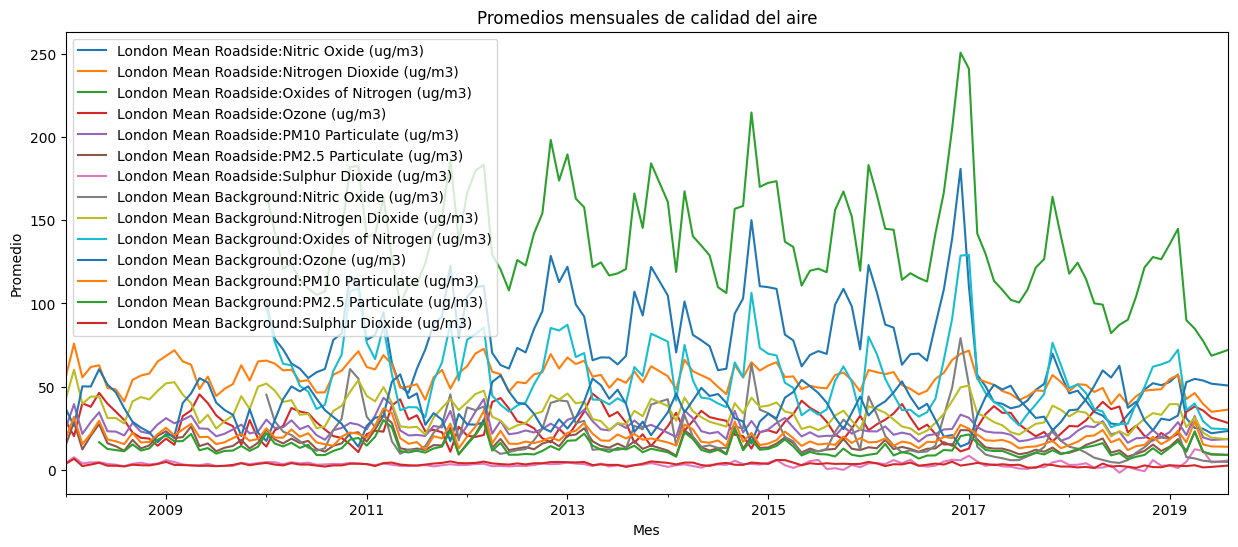

In [136]:
monthly_avg.plot(figsize=(15, 6))
plt.title("Promedios mensuales de calidad del aire")
plt.ylabel("Promedio")
plt.xlabel("Mes")
plt.legend(loc="best")
plt.show()